# ☑ Генерация случайных выборок


Перед тем, как приступить к тесту, необходимо научиться генерировать произвольные выборки с заданными параметрами из распределений:

  -  нормальное,
  -  χ 2(хи-квадрат),
  -  экспоненциальное,
  -  биномиальное.

Также необходимо понимать работу команды построения гистограммы `hist`.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Образцы кода можно найти в блокноте Task_algo_generatio.ipynb .

Для выполнения работы создайте новый блокнот и перенесите в него команды по импорту библиотек.
Можно взять за основу блокнот Task_algo_generatio.ipynb, добавив новое содержимое в конце.
Если хотите блокнот со своими решениями оставить для портфолио - сохраните с понятным Вам именем себе на компьютер.

Для проверки освоения приёмов вы должны пройти тест с задачами. Задачи однотипные, поэтому, если вы разобрались с их решением, то можете легко решить сколько угодно подобных задач. Подтверждением того, что освоили требуемые приёмы решения, должно быть 100% успешно выполненных задач. 

Например, Вам попалась задача:

> Инициализируйте ГСЧ с состоянием 555. Сгенерируйте выборку из 20 значений из биномиального распределения с параметрами: n=20, p=0.7.
Постройте гистограмму распределения и определите,
сколько значений попали в диапазон от 14.6 до 15.2?

и варианты ответа: 0, 5, 3, 2

Нужно безошибочно выделить условия задачи и применить в правильных местах при вызове функций генерации выборки и построения рисунка:

- Состояние ГСЧ - это аргумент для функции `seed()`.
- 20 значений - это размер выборки, он задаётся через параметр `size=` у большинства функций распределений.
- также даны параметры - их надо задать при вызове генератора, при этом ничего не перепутать. Будьте внимательны! Количество и порядок параметров у каждой функции свой. Смотрите справку к каждой функции.


По условию задачи нам нужен генератор по биномиальному закону: `binomial`, в справке которого указано:

```
binomial(n, p, size=None)

Draw samples from a binomial distribution.
```

У функции три аргумента `n, p, size`, которые можно задавать через запятую в этом же порядке, или с указанием имени аргумента со знаком равно.

In [4]:
seed(555)
binomial(20, 0.7, 20)  #вариант передачи аргументов по порядку

array([13, 17, 11, 13, 14, 16, 11, 15, 13, 14, 15, 18, 16, 12, 13, 14, 17,
       14, 11, 14])

Полученный массив чисел нужно отправить на вход функции `hist()`. Про параметры построения рисунка в задаче ничего не сказано, значит будем вызывать эту функцию без дополнительных параметров - только массив с данными.

(array([3., 1., 4., 0., 5., 2., 0., 2., 2., 1.]),
 array([11. , 11.7, 12.4, 13.1, 13.8, 14.5, 15.2, 15.9, 16.6, 17.3, 18. ]),
 <BarContainer object of 10 artists>)

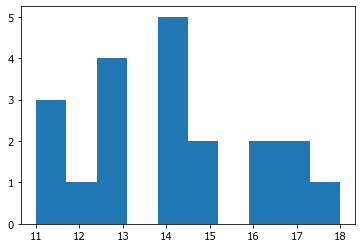

In [5]:
seed(555)
hist(binomial(size=20, n=20, p=0.7))  #вариант передачи аргументов по имени

На рисунке видно, что в указанном диапазоне около отметки 15 расположен столбик высотой 2 ед. Это и есть правильный ответ: в этот диапазон попало два значения из сгенерированной выборки.

Иногда количество значений значительное, и на глаз трудно точно определить нужное число по высоте столбика. В этом случае на помощь придут данные, которые возвращает функция `hist()` в дополнение к рисованию графика. Если не ставить знак точки с запятой `;`, который подавляет вывод последней команды в ячейке, то на экран выводится информация о трёх массивах.

В первом массиве десять чисел, которые соответствуют высоте столбиков. Обратите внимание, что там, где столбики пропущены, стоят нули. То есть, если не задавать количество классов гистограммы с помощью параметра `bins=`, то всегда рассчитывается 10 классов (диапазонов).

Во втором массиве выводятся границы этих десяти диапазонов. Первая "корзинка" гистограммы расположена между  11. и 11.7 и в неё попало 3 значения. Там, где закончилась первая корзинка началась вторая - от 11.7 до 12.4. Поскольку всего десять корзин и каждая ограничена с двух сторон, то в массиве краёв диапазонов одиннадцать значений - на одно больше, чем самих диапазонов.

В третьем массиве выдаются ссылки на контейнеры - прямоугольные графические объекты, из которых состоит столбчатая диаграмма. Это может пригодиться для модификации рисунка - для замены заливки, добавления надписей и т.п. В данном задании они не нужны.

> Попробуйте найти правильный ответ, полагаясь только на выведенные числовые массивы?
Для этого необходимо в массиве границ (втором массиве чисел) найти пару значений из вопроса задачи. В задаче указаны числа 14.6 и 15.2. Это 6-е и 7-е числа массива границ корзинок. То, что 14.6 и 14.5 отличаются на одну десятую, можно списать на ошибку округления при выводе чисел в текстовом виде на экран.
Между 6-й и 7-й границами находится 6-я корзинка, поэтому теперь надо найти шестое по счёту значение из первого массива чисел. Шестое значение - это 2, которая идет после 5 и перед 0. Правильный ответ - 2.

Мы рассмотрели наиболее компактное решение, которое заняло всего две строчки кода.

Если завести переменные для каждого условия задачи, то код станет намного понятнее. Понятный код легче использовать повторно, ведь впереди ждут еще несколько задач подобного типа. 
Однако написание универсального кода более трудоёмко, и иногда проще сделать копию ячейки с кодом и заменить пару значений. Главное - не запутаться в названиях распределений, порядке параметров и координатных осях.

Названия переменных можно задавать любыми символами кроме тех, что используются в самом языке (точка, двоеточие, минус и др.). Поэтому символы кириллицы также пригодны для создания имён переменных, но они должны составлять одно слово. Вместо пробела можно использовать знак подчёркивания `_`.

2

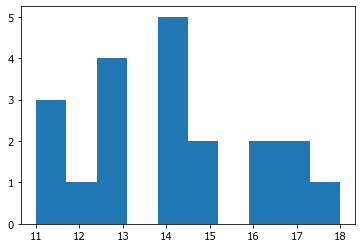

In [20]:
ГСЧ = 555
размер = 20
распределение = binomial
параметры = dict(n=20, p=0.7)
границы = (14.6, 15.2)

seed(ГСЧ)
выборка = распределение(size=размер, **параметры)
# сохраняем массивы в переменные вместо вывода на экран
высоты, широты, _ = hist(выборка)
# находим позицию близкую к левой границе с погрешностью в одну сотую
индекс = where(isclose(широты, границы[0], 0.01))[0][0]
# извлекаем нужную высоту по индексу
ответ = int(высоты[индекс])
ответ

Составление более сложных "интеллектуальных" скриптов для обработки данных оправдано только тем, что этот код можно использовать многократно для решения однотипных задач.
Однако, заранее трудно продумать все нюансы работы программы в разных условиях.
Будет ли она работать с другими функциями генерации распределений с другим количеством параметров? А что будет, если выборка будет состоять из одинаковых чисел (если стандартное отклонение равно 0)? А если выборка будет очень большая?
Скорее всего программа справится, поскольку при написании вариативное количество параметров было учтено. Синтаксис с двумя звёздочками `**параметры` используется, чтобы передать в функцию вариативное количество параметров. 
Тем не менее сложные программы потенциально более подвержены возникновению ошибок и разных конфликтующих ситуаций с данными. 
При возникновении ошибок код можно поправить для учёта таких редких случаев - это так называемая *отладка* программы. При отладке программу тестируют с разными входными данными и проверяют, чтобы она выдавала адекватный результат при самых разных сочетаниях  и условиях.

При работе с учебными задачами рекомендуется копировать текст задания в ячейку с комментарием, и в следующих 1-3 ячейках с кодом находить решение. И так повторить для всех заданий. В итоге у Вас останется блокнот с рабочими решениями, к которым можно будет обращаться в случае необходимости.